In [105]:
import pandas as pd
import shutil
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import csv

# SONYC Music Project

The SONYC project has recorded more than 100 years' worth of audio data from around New York City. The audio data tells us a lot about the dynamics of the city, including when people are the loudest, traffic, and music played on the streets of the city. In the MARL lab, previous projects have looked at data surrounding 311 noise complaints, but other indicators of the city's social dynamics, such as music, haven't been as throughly explored. The reason we are looking at music is we believe there is valuable information in the music aspect of the SONYC data. Being in touch with the MIR (Music Information Research) community, we believe it will be an important contribution to create a dataset of music in NYC. This type of data will be unique, because most music data is recorded in controlled conditions and/or close field, whereas this project looks at a broader scope of music collection.

## First, we looked at the SONYC UST dataset and explored the music data it contains.

In [106]:
df_annotations = pd.read_csv(r'C:\Users\kmcdo\Downloads\annotations.csv')

In [107]:
df = df_annotations.copy()

In [108]:
df

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,validate,0,00_000066.wav,95,1,547,40.729508,-73.993881,2017,28,...,far,far,1,1,1,1,1,1,1,1
1,validate,0,00_000066.wav,108,1,547,40.729508,-73.993881,2017,28,...,-1,-1,1,0,0,0,0,0,0,0
2,validate,0,00_000066.wav,127,1,547,40.729508,-73.993881,2017,28,...,-1,-1,1,0,0,0,0,0,0,0
3,validate,0,00_000071.wav,64,1,547,40.729508,-73.993881,2016,50,...,-1,-1,1,0,0,0,0,0,0,0
4,validate,0,00_000071.wav,66,1,547,40.729508,-73.993881,2016,50,...,-1,-1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56775,validate,10,10_003220.wav,-4,1,481,40.721046,-73.997280,2017,44,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
56776,validate,10,10_003220.wav,-2,1,481,40.721046,-73.997280,2017,44,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
56777,validate,10,10_003220.wav,-1,1,481,40.721046,-73.997280,2017,44,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
56778,validate,10,10_003220.wav,-1,1,481,40.721046,-73.997280,2017,44,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1


In [109]:
df_new = df_annotations.groupby("audio_filename").mean()
df_new

,sensor_id,annotator_id,borough,block,latitude,longitude,year,week,day,hour,...,7-X_other-unknown-human-voice_presence,8-1_dog-barking-whining_presence,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
audio_filename,,,,,,,,,,,,,,,,,,,,,
00_000066.wav,0.0,14.650000,1.0,547.0,40.729508,-73.993881,2017.0,28.0,2.0,0.0,...,-0.650000,-0.65,-0.400000,-0.650000,-0.650000,-0.650000,-0.65,-0.65,-0.650000,-0.65
00_000071.wav,0.0,87.666667,1.0,547.0,40.729508,-73.993881,2016.0,50.0,5.0,13.0,...,0.000000,0.00,0.333333,0.333333,0.000000,0.333333,0.00,0.00,0.000000,0.00
00_000085.wav,0.0,116.333333,1.0,547.0,40.729508,-73.993881,2017.0,3.0,0.0,9.0,...,0.000000,0.00,0.333333,0.333333,0.000000,0.333333,0.00,0.00,0.000000,0.00
00_000118.wav,0.0,28.250000,1.0,547.0,40.729508,-73.993881,2017.0,40.0,0.0,21.0,...,-0.250000,-0.50,0.250000,-0.500000,-0.500000,-0.500000,-0.50,-0.50,0.375000,-0.50
00_000179.wav,0.0,83.000000,1.0,547.0,40.729508,-73.993881,2016.0,45.0,3.0,9.0,...,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46_020426.wav,46.0,5405.333333,1.0,559.0,40.733647,-73.988785,2019.0,3.0,3.0,10.0,...,0.000000,0.00,0.000000,0.333333,0.000000,0.000000,0.00,0.00,0.000000,0.00
46_020573.wav,46.0,5276.333333,1.0,559.0,40.733647,-73.988785,2018.0,38.0,3.0,22.0,...,0.000000,0.00,0.333333,0.333333,0.000000,0.000000,0.00,0.00,0.000000,0.00
46_020723.wav,46.0,5381.000000,1.0,559.0,40.733647,-73.988785,2018.0,41.0,0.0,10.0,...,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00


In [110]:
#Dropping columns we don't need
df = df.drop(df.loc[:, '1-1_small-sounding-engine_presence':'5_alert-signal_presence'].columns, axis = 1)
df = df.drop(df.loc[:, '7_human-voice_presence':'8_dog_presence'].columns, axis = 1)

In [111]:
#Filtering rows to exclude non-music recordings
music_present = df['6_music_presence']==1
music_is_present = df[music_present]
df = music_is_present

In [112]:
#grouping by sensor ID

df_filtered = df.groupby(['sensor_id', 'audio_filename', 'borough', 'block', 'longitude', 
            'latitude', 'year', 'week', 'day','hour']).median().reset_index()
df_filtered

,sensor_id,audio_filename,borough,block,longitude,latitude,year,week,day,hour,annotator_id,6_music_presence
0,0,00_000066.wav,1,547,-73.993881,40.729508,2017,28,2,0,95.0,1.0
1,0,00_001707.wav,1,547,-73.993881,40.729508,2018,5,0,21,808.0,1.0
2,0,00_001897.wav,1,547,-73.993881,40.729508,2017,44,0,13,537.0,1.0
3,0,00_001967.wav,1,547,-73.993881,40.729508,2017,3,0,16,544.0,1.0
4,0,00_004480.wav,1,547,-73.993881,40.729508,2017,6,2,12,2499.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1546,46,46_013692.wav,1,559,-73.988785,40.733647,2018,47,4,1,4359.0,1.0
1547,46,46_018421.wav,1,559,-73.988785,40.733647,2019,5,0,7,5132.0,1.0
1548,46,46_018541.wav,1,559,-73.988785,40.733647,2018,40,4,19,5093.0,1.0
1549,46,46_019574.wav,1,559,-73.988785,40.733647,2018,45,6,2,5237.0,1.0


In [113]:
len(df_filtered['audio_filename'].unique())

1551

In [114]:
audio_list = list(df_filtered['audio_filename'])

### Here, we made a separate folder for all of the recordings where some type of music was present. 

##### From the separated recordings, we listened to some of the clips in order to gain a sense of the trends and patterns present in the audio itself. The notes can be found [here](https://docs.google.com/document/d/1ArMiZUOhUzymesyvP8JLYIT10ruRMqtorb9ELmWxrOY/edit?usp=sharing).

In [115]:
destination_directory = "Music_subset_ARISE"
if not os.path.exists(destination_directory):
    os.mkdir(destination_directory)

In [116]:
#making a separate folder for audio files with music
#root = r"C:\Users\kmcdo\OneDrive\Desktop\audio"
#for file in audio_list:
   # path_file = os.path.join(root,file)
   # shutil.copy2(path_file, destination_directory)

### Now, we are looking at the data using Seaborn graphs.

Text(0.5, 1.0, 'Instances of music per day of the week')

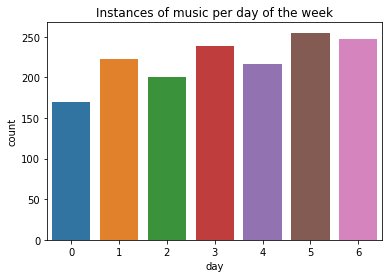

In [117]:
#Showing number of music instances based on day of the week
ax = sns.countplot(x="day", data=df_filtered)
plt.title('Instances of music per day of the week')

There isn't a lot of variation in instances of music based on day of the week, which is reasonable because this graph summarizes the data from every week the microphones were picking up audio, not just any one particular week.

Text(0.5, 1.0, 'Instances of music per hour of the day')

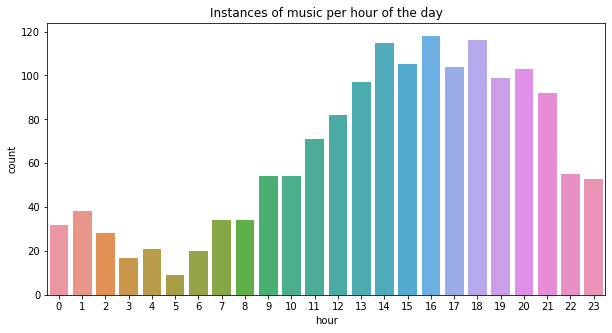

In [118]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x="hour", data=df_filtered)
plt.title ("Instances of music per hour of the day")

This graph shows the most clear and promising results. 2 PM to 5 PM was time period in which the most instances of music were recorded, and 3 AM to 6 AM had the least amount of instances of music. This shows that there is a strong hourly trend in the amount of music played, and that there isn't much variation in hourly music instances from day to day. 

Text(0.5, 1.0, 'Instances of music per week of the year')

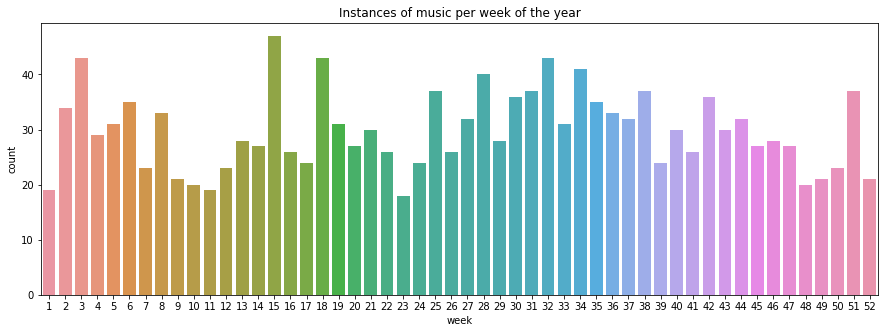

In [119]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="week", data=df_filtered)
plt.title ("Instances of music per week of the year")

Similarly to the 'Instances of music per day of the week' graph, there is a lot of variation from week to week. It seemed probable that the instances of music per week would be much higher in the summertime (weeks 26 to 39) and much lower in the winter (weeks 51 to 13) due to temperature changes, but there is only a small rise in instances during the summer, and a large variation in instances recorded during the winter. 

Text(0.5, 1.0, 'Instances of music per year')

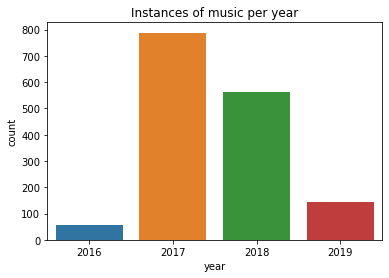

In [120]:

ax = sns.countplot(x="year", data=df_filtered)
plt.title ("Instances of music per year")

Text(0.5, 1.0, 'Instances of sound per year')

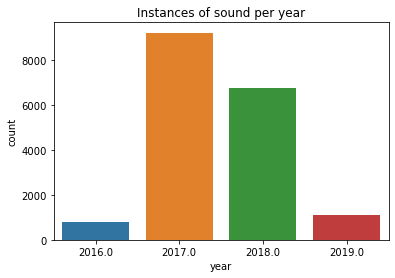

In [121]:
ax = sns.countplot(x="year", data=df_new)
plt.title ("Instances of sound per year")

## Geographic Analysis

While the total number of audio files with music present tells us a lot about temporal trends, we also visualized the data using sensor numbers, in order to gain an understanding of trends in location within the dataset.

Text(0.5, 1.0, 'Instances of music in dataset per sensor')

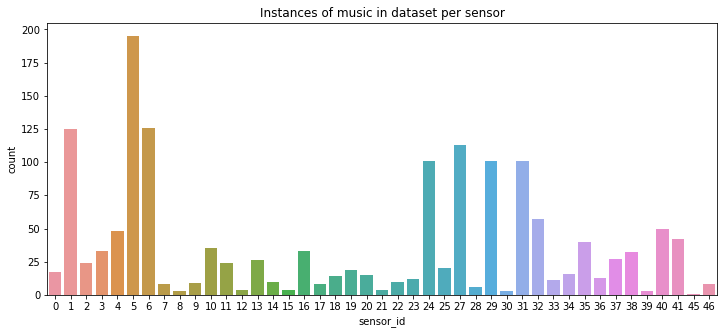

In [122]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(x="sensor_id", data=df_filtered)
plt.title ("Instances of music in dataset per sensor")

## Comparing the SONYC UST Dataset and the Filtered Music Dataset

In order to determine the correlation between trends present in the new, filtered dataset and the original, larger dataset, we graphed the temporal and location trends in the UST dataset to compare them to what we've seen when visualizing the music dataset.

Text(0.5, 1.0, 'Audio recordings per hour')

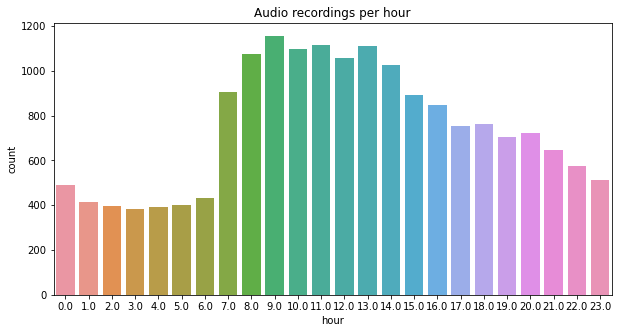

In [123]:
#Showing number of audio files based on hour of the day
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x="hour", data=df_new)
plt.title('Audio recordings per hour')

The SONYC UST dataset is similar to the music dataset in that it has a low period at night and in the early morning, but this graph shows that overall noise tends to increase during rush hour and decrease in the afternoon. The music dataset tends to increase slowly throughout the day, peak at around 4 PM, and decrease in the early morning. 

Text(0.5, 1.0, 'Audio recordings per day of the week')

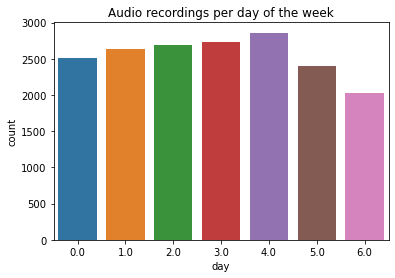

In [124]:
#Showing number of audio files based on day of the week
ax = sns.countplot(x="day", data=df_new)
plt.title('Audio recordings per day of the week')

In the SONYC UST dataset, there is significantly more sound recorded during the week (days 0-4) than on the weekend (days 5-6), whereas in the music dataset, there is slightly more music recorded during the weekend. 

Text(0.5, 1.0, 'Audio recordings per week of the year')

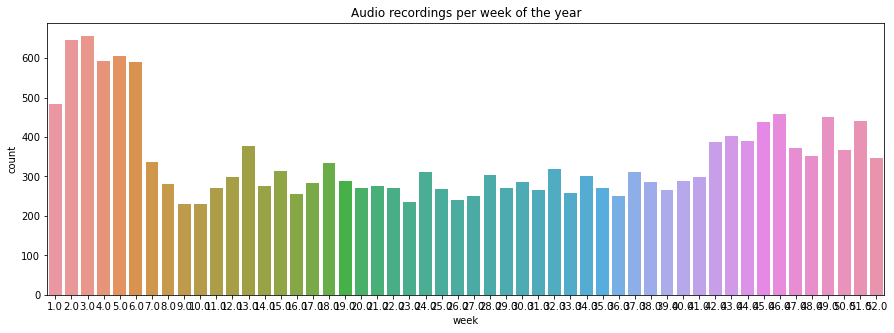

In [125]:
#Showing number of music instances based on week of the year
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="week", data=df_new)
plt.title('Audio recordings per week of the year')

In the SONYC UST dataset, there is significantly more audio picked up during the winter (pink columns) than the rest of the year, whereas in the music dataset, there is slightly more music recorded during the summer and slightly less during the winter.

Text(0.5, 1.0, 'Audio recordings in dataset per sensor')

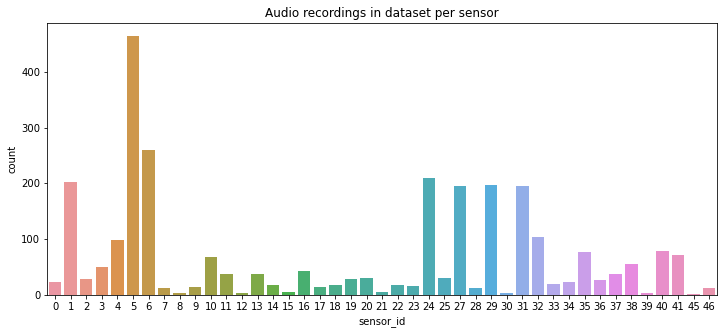

In [126]:
fig = plt.figure(figsize=(12,5))
ax = sns.countplot(x="sensor_id", data=df)
plt.title ("Audio recordings in dataset per sensor")

While there are clearly some sensors that pick up more sound than others, this graph does not take into account the amount of time a sensor was deployed. It is entirely possible that it is not louder in the areas where those sensors are, they were just deployed for a longer period of time. 

In [144]:
random_audio = df_filtered['audio_filename'].sample(n=200)
random_audio

1202    31_016744.wav
191     03_017781.wav
406     05_019325.wav
93      01_017266.wav
706     16_010043.wav
            ...      
1089    29_016457.wav
570     07_009987.wav
760     19_017329.wav
1130    29_019425.wav
367     05_017772.wav
Name: audio_filename, Length: 200, dtype: object

In [158]:
with open('random_audio.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["audio_filename", "music_presence", "annotations"])
    
    for name in random_audio:
        print(name)
        writer.writerow([name])

31_016744.wav
03_017781.wav
05_019325.wav
01_017266.wav
16_010043.wav
22_019291.wav
05_009012.wav
01_005849.wav
11_018261.wav
29_016872.wav
29_012959.wav
36_019862.wav
14_005856.wav
24_018795.wav
09_010384.wav
34_006641.wav
35_019321.wav
05_004045.wav
31_016320.wav
29_009006.wav
01_017065.wav
08_018801.wav
27_012546.wav
32_020450.wav
27_018292.wav
34_005596.wav
32_017703.wav
05_020189.wav
16_003604.wav
06_013033.wav
00_012878.wav
05_016537.wav
32_004971.wav
04_018137.wav
01_020086.wav
01_017593.wav
04_009717.wav
37_004313.wav
04_018743.wav
06_018099.wav
27_004341.wav
05_017748.wav
10_011931.wav
24_017927.wav
05_018884.wav
46_018421.wav
31_017151.wav
38_017141.wav
05_006058.wav
17_020671.wav
01_001667.wav
35_016512.wav
05_012463.wav
31_017364.wav
24_006822.wav
37_004612.wav
35_002153.wav
17_019843.wav
05_020660.wav
10_019405.wav
02_013583.wav
01_000061.wav
05_018881.wav
25_018552.wav
05_018496.wav
35_010067.wav
38_019285.wav
03_002934.wav
18_011901.wav
41_016845.wav
04_006393.wav
32_018

In [159]:
pwd

'C:\\Users\\kmcdo'